In [5]:
import numpy as np
import sympy as smp 
import matplotlib.pyplot as plt 

In [99]:
erroinst = 0.005  #em metros
g = 10            #metros/s^2
Deltay = erroinst

Aqui definimos as variaveis dependente e independente (em metros) e o numero de dados

In [59]:
y = np.array([2.060,1.455,1.364,1.263,1.165,1.065,0.965,0.865,0.565,0.465,0.170])
x = np.array([1.244,1.014,0.963,0.927,0.888,0.850,0.812,0.767,0.622,0.562,0.347])
n = len(x)

Fazemos a transformação $x^2\to X$, $y\to Y$

In [97]:
yy = y
xx = np.multiply(x,x)

Plotamos os dados sem linearizar e linearizados pela transformação de variaveis.

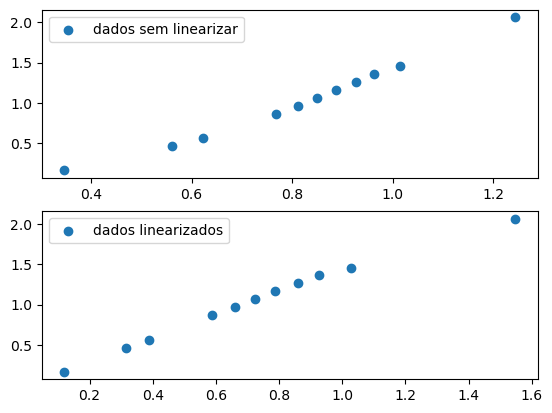

In [63]:
plt.figure()
plt.subplot(211)
plt.scatter(x,y,label='dados sem linearizar')
plt.legend()
plt.subplot(212)
plt.scatter(xx,yy,label='dados linearizados')
plt.legend()
plt.show()

Regresão linear, caso simples (erros iguais na variavel dependente, $\Delta y = \Delta_{inst}$. Note que a regresão é feita usando os dados linearizados. 

In [87]:
xxxx = np.multiply(xx,xx)
xxyy = np.multiply(xx,yy)

In [88]:
K = sum(xx)
L = sum(yy)
M = sum(xxxx)
O = sum(xxyy)

In [89]:
D = n*M - K*K
a = ((n*O) - (L*K))/D
b = ((L*M) - (O*K))/D
Deltaa = np.sqrt(n/D)*Deltay
Deltab = np.sqrt(M/D)*Deltay

Calculo do erro $\Delta v_0$: a equação  cinematica é $y=\frac{g}{2v_0^2}x^2$ ou $Y = \frac{g}{2v_0^2} X$ que é linear. Comparando com a reta de regressão $y=ax+b$, concluimos que $a=\frac{g}{2v_0^2}$ de onde $v_0 = \sqrt{\frac{g}{2a}}$. Note que a velocidade $v_0$ é uma função de $a$. Para encontrar o erro devemos fazer $\Delta v_0 = \sqrt{\left(\frac{\partial v_0}{\partial a}\right)^2 (\Delta a)^2}$. 

In [92]:
aa = smp.Symbol('aa')
gg =  smp.Symbol('gg')
def v0(aa,gg): 
    return smp.sqrt(gg/(2*aa))
def derivada(aa,gg):
    return smp.diff(v0(aa,gg),aa)
derivadaavaliada = smp.lambdify((aa,gg),derivada(aa,gg),"numpy")
errovelocidade = np.sqrt(derivadaavaliada(a,g)**2 * Deltay**2)
velocidade = v0(a,g)

In [93]:
errovelocidade, velocidade

(0.003586387112387179, 1.92854178779909)

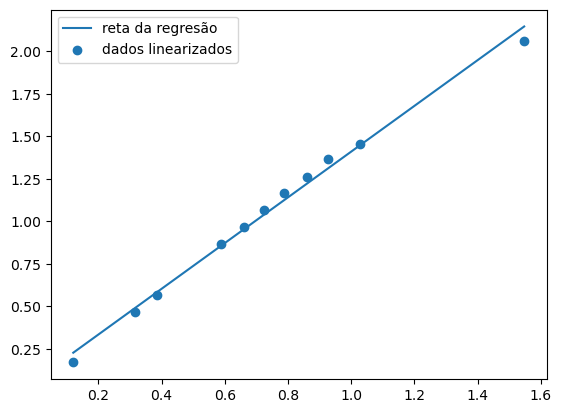

In [100]:
plt.plot(xx,a*xx+b, label='reta da regresão')
plt.scatter(xx,yy,label='dados linearizados')
plt.legend()
plt.show()